<a href="https://colab.research.google.com/github/ubsuny/MC-CP2P2024/blob/monte_carlo/monte_carlo_qutip_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install qutip


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

/usr/local/lib/python3.10/dist-packages/qutip/__init__.py:66: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


10.0%. Run time:   4.33s. Est. time left: 00:00:00:39
20.0%. Run time:   7.36s. Est. time left: 00:00:00:29
30.0%. Run time:   9.78s. Est. time left: 00:00:00:22
40.0%. Run time:  11.52s. Est. time left: 00:00:00:17
50.0%. Run time:  13.22s. Est. time left: 00:00:00:13
60.0%. Run time:  15.37s. Est. time left: 00:00:00:10
70.0%. Run time:  17.80s. Est. time left: 00:00:00:07
80.0%. Run time:  19.52s. Est. time left: 00:00:00:04
90.0%. Run time:  21.28s. Est. time left: 00:00:00:02
100.0%. Run time:  23.02s. Est. time left: 00:00:00:00
Total run time:  23.03s


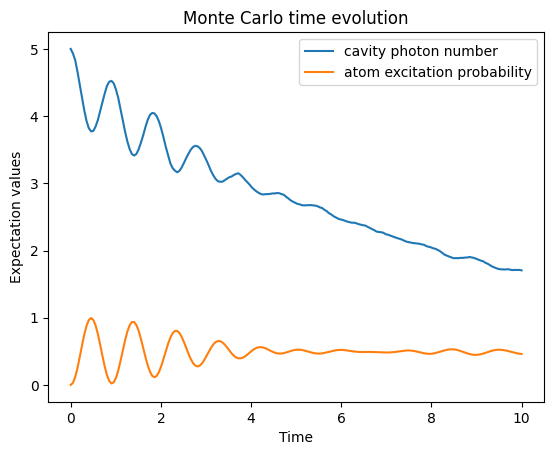

In [ ]:
times = np.linspace(0.0, 10.0, 200)
psi0 = tensor(fock(2, 0), fock(10, 5))
a  = tensor(qeye(2), destroy(10))
sm = tensor(destroy(2), qeye(10))
H = 2*np.pi*a.dag()*a + 2*np.pi*sm.dag()*sm + 2*np.pi*0.25*(sm*a.dag() + sm.dag()*a)
data = mcsolve(H, psi0, times, [np.sqrt(0.1) * a], [a.dag() * a, sm.dag() * sm])

plt.figure()
plt.plot(times, data.expect[0], times, data.expect[1])
plt.title('Monte Carlo time evolution')
plt.xlabel('Time')
plt.ylabel('Expectation values')
plt.legend(("cavity photon number", "atom excitation probability"))
plt.show()

In [ ]:
data = mcsolve(H, psi0, times, [np.sqrt(0.1) * a], [a.dag() * a, sm.dag() * sm], ntraj=1000)

10.0%. Run time:   5.56s. Est. time left: 00:00:00:50
20.0%. Run time:   9.21s. Est. time left: 00:00:00:36
30.0%. Run time:  13.92s. Est. time left: 00:00:00:32
40.0%. Run time:  17.56s. Est. time left: 00:00:00:26
50.0%. Run time:  21.25s. Est. time left: 00:00:00:21
60.0%. Run time:  25.86s. Est. time left: 00:00:00:17
70.0%. Run time:  29.42s. Est. time left: 00:00:00:12
80.0%. Run time:  33.14s. Est. time left: 00:00:00:08
90.0%. Run time:  37.77s. Est. time left: 00:00:00:04
100.0%. Run time:  41.51s. Est. time left: 00:00:00:00
Total run time:  41.53s


In [ ]:
ntraj = [1, 10, 100, 1000]


In [ ]:
data = mcsolve(H, psi0, times, [np.sqrt(0.1) * a], [a.dag() * a, sm.dag() * sm], ntraj=[1, 10, 100, 1000])


10.0%. Run time:   4.59s. Est. time left: 00:00:00:41
20.0%. Run time:   8.28s. Est. time left: 00:00:00:33
30.0%. Run time:  12.80s. Est. time left: 00:00:00:29
40.0%. Run time:  17.21s. Est. time left: 00:00:00:25
50.0%. Run time:  21.36s. Est. time left: 00:00:00:21
60.0%. Run time:  25.91s. Est. time left: 00:00:00:17
70.0%. Run time:  30.03s. Est. time left: 00:00:00:12
80.0%. Run time:  34.80s. Est. time left: 00:00:00:08
90.0%. Run time:  39.08s. Est. time left: 00:00:00:04
100.0%. Run time:  42.66s. Est. time left: 00:00:00:00
Total run time:  42.67s


In [ ]:
expt1 = data.expect[0]
expt10 = data.expect[1]
expt100 = data.expect[2]
expt1000 = data.expect[3]

In [ ]:
print(expt1)

[array([5.        , 3.97514813, 3.90298103, 3.79042586, 3.64861721,
       3.49179025, 3.3357944 , 3.19638814, 3.08754922, 3.02002301,
       3.00025749, 3.02986269, 3.10558462, 3.21974826, 3.36109189,
       3.5158665 , 3.66910788, 3.80599169, 3.9131741 , 3.98003652,
       3.99974577, 3.97001107, 3.89344214, 3.77741962, 3.63344129,
       3.4759757 , 3.32093866, 3.18398857, 3.07884222, 3.01585361,
       3.00100715, 3.03542164, 3.11537483, 3.2327958 , 3.37611999,
       3.53142005, 3.6836854 , 3.81817889, 3.92177217, 3.98418226,
       3.9989987 , 3.96440922, 3.88351196, 3.76413495, 3.61812997,
       3.46018289, 3.30626266, 3.1719057 , 3.07055411, 3.01216382,
       3.00224824, 3.04143562, 3.12554315, 3.24610694, 3.39127566,
       3.54695235, 3.69809185, 3.83006159, 3.92996281, 3.98785524,
       3.99775846, 3.95834318, 3.87319408, 3.75058039, 3.60269584,
       3.44442765, 3.29177964, 3.16015171, 3.06269463, 3.00895745,
       3.00397925, 3.04789802, 3.13607549, 3.25966448, 3.4065

In [ ]:
options = Options(rhs_reuse=True)

10.0%. Run time:   2.75s. Est. time left: 00:00:00:24
20.0%. Run time:   4.49s. Est. time left: 00:00:00:17
30.0%. Run time:   7.13s. Est. time left: 00:00:00:16
40.0%. Run time:   9.11s. Est. time left: 00:00:00:13
50.0%. Run time:  10.90s. Est. time left: 00:00:00:10
60.0%. Run time:  12.65s. Est. time left: 00:00:00:08
70.0%. Run time:  14.51s. Est. time left: 00:00:00:06
80.0%. Run time:  16.27s. Est. time left: 00:00:00:04
90.0%. Run time:  18.17s. Est. time left: 00:00:00:02
100.0%. Run time:  20.79s. Est. time left: 00:00:00:00
Total run time:  20.82s
10.0%. Run time:   3.32s. Est. time left: 00:00:00:29
20.0%. Run time:   6.83s. Est. time left: 00:00:00:27
30.0%. Run time:  10.07s. Est. time left: 00:00:00:23
40.0%. Run time:  14.33s. Est. time left: 00:00:00:21
50.0%. Run time:  17.51s. Est. time left: 00:00:00:17
60.0%. Run time:  20.64s. Est. time left: 00:00:00:13
70.0%. Run time:  24.03s. Est. time left: 00:00:00:10
80.0%. Run time:  27.86s. Est. time left: 00:00:00:06
90.

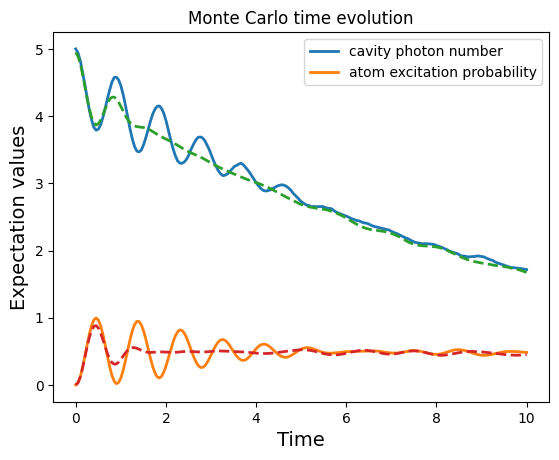

In [ ]:
times = np.linspace(0.0, 10.0, 200)
psi0 = tensor(fock(2, 0), fock(10, 5))
a  = tensor(qeye(2), destroy(10))
sm = tensor(destroy(2), qeye(10))

H = 2*np.pi*a.dag()*a + 2*np.pi*sm.dag()*sm + 2*np.pi*0.25*(sm*a.dag() + sm.dag()*a)
data1 = mcsolve(H, psi0, times, [np.sqrt(0.1) * a], [a.dag() * a, sm.dag() * sm])
psi1 = tensor(fock(2, 0), coherent(10, 2 - 1j))
opts = Options(rhs_reuse=True) # Run a second time, reusing RHS
data2 = mcsolve(H, psi1, times, [np.sqrt(0.1) * a], [a.dag() * a, sm.dag() * sm], options=opts)

plt.figure()
plt.plot(times, data1.expect[0], times, data1.expect[1], lw=2)
plt.plot(times, data2.expect[0], '--', times, data2.expect[1], '--', lw=2)
plt.title('Monte Carlo time evolution')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Expectation values', fontsize=14)
plt.legend(("cavity photon number", "atom excitation probability"))
plt.show()